In [12]:
#Week4.1

In [114]:
#import necessary libraries
#pandas for dataset management
import pandas as pd
#matplotlib and seaborn for plots
import seaborn as sns
import matplotlib.pyplot as plt
#import tensorflow for neural network training
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#Sklearn for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
#numpy
import numpy as np

In [24]:
#importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [126]:
#load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [34]:
#normalize the dataset to the range [0,1] to ensure efficient model training
def normalize_img(image, label):
    # Normalize images to [0, 1] range
    return tf.cast(image, tf.float32) / 255.0, label

In [38]:
#shaping

In [40]:
#viewing dataset shapes
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [44]:
#we have 60k images, each being 28x28 px
#the keras model is a convolutional neural network, hence it requires reshaping, i.e (batch_size, height, width, channels)

In [128]:
# Reshape the data to include a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
#1 => grayscale

In [133]:
# Define the callbacks
#Model Checkpoint, saves the model (or model weights) at intervals during training to save model progress/backups in case of training failure
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)
#Early Stopping, saves time and resource by halting the training process when the model has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

In [142]:
#trainingthe model with callbacks

In [144]:
# Compile the model, using the adam optimizer and the SparseCategoricalCrossentropy loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
# Use the callbacks during training
history = model.fit(
    train_images, train_labels,
    epochs=50,
    validation_data=(test_images, test_labels),
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/50
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7663 - loss: 0.8228
Epoch 1: val_loss improved from inf to 0.38054, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7669 - loss: 0.8199 - val_accuracy: 0.8665 - val_loss: 0.3805
Epoch 2/50
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.3417
Epoch 2: val_loss improved from 0.38054 to 0.34099, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8742 - loss: 0.3417 - val_accuracy: 0.8772 - val_loss: 0.3410
Epoch 3/50
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8924 - loss: 0.2934
Epoch 3: val_loss improved from 0.34099 to 0.33791, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8924 - loss: 0.2934 - val_accuracy: 0.8784 - val_loss: 0.3379
Epoch 4/50
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8984 - loss: 0.2718
Epoch 4: val_loss improved from 0.33791 

In [102]:
#Model evaluation

In [100]:
# Evaluate the model accuracy on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - 1ms/step - accuracy: 0.8911 - loss: 0.3195

Test accuracy: 0.8910999894142151


In [98]:
#Pretty good accuracy

In [110]:
# Generate predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [118]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

In [120]:
# Print classification report
print(classification_report(test_labels, predicted_labels, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.76      0.89      0.82      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.80      0.82      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.74      0.65      0.69      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



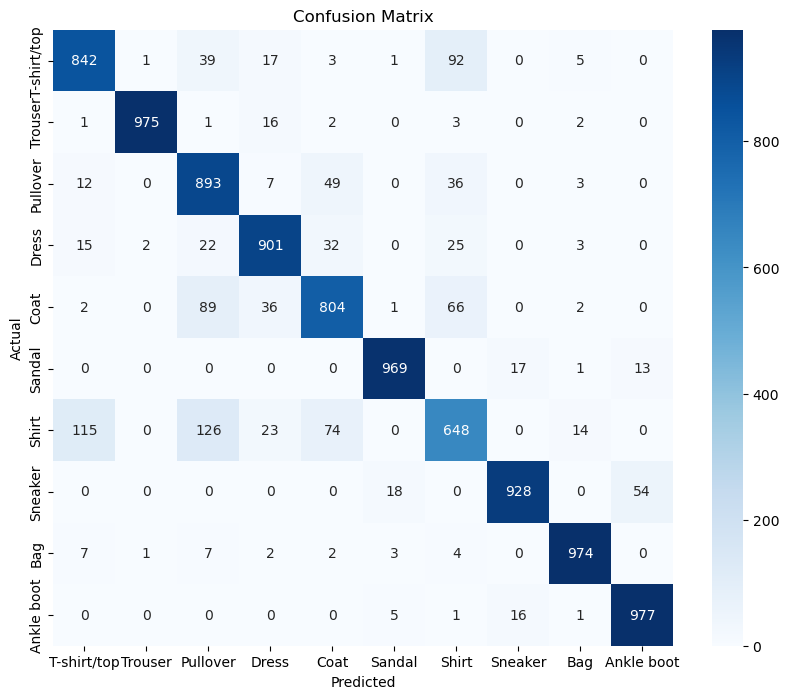

In [122]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
], yticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [124]:
#The true positive classes look good
